In [1]:
#load necessary library

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Download necessary NLTK data (Run only once)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load dataset
df = pd.read_csv("data/labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
# Initialize tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [6]:
# Define text cleaning function
def clean_text(text):
    if isinstance(text, str):  # Ensure text input
        text = text.lower()  # Lowercase
        text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
        text = re.sub(r"\d+", "", text)  # Remove numbers
        text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
        words = word_tokenize(text)  # Tokenization
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
        return " ".join(words)
    return ""

In [7]:
# Apply cleaning function
df["clean_text"] = df["tweet"].apply(clean_text)

In [8]:
# Save cleaned data
df.to_csv("cleaned_dataset.csv", index=False)
print("Text cleaning complete. Cleaned data saved!")

Text cleaning complete. Cleaned data saved!


In [9]:
df_cleaned=pd.read_csv("cleaned_dataset.csv")
df_cleaned.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat coldtyga dwn bad cuffin dat h...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c_g_anderson viva_based look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...


In [10]:
df_cleaned.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
clean_text            0
dtype: int64

In [11]:
df_cleaned['class'].value_counts(normalize=True)

class
1    0.774321
2    0.167978
0    0.057701
Name: proportion, dtype: float64

In [12]:
#tweet lenegth analysis
df_cleaned['tweet_length'] = df_cleaned['clean_text'].apply(lambda x: len(x.split()))
df_cleaned.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_text,tweet_length
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman shouldnt complain cleani...,12
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat coldtyga dwn bad cuffin dat h...,12
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...,12
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c_g_anderson viva_based look like tranny,6
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...,11


In [13]:
#word frequency analysis
from collections import Counter
# Combine all cleaned tweets into one large text
all_words = " ".join(df_cleaned['clean_text'])

# Tokenize and count word frequencies
word_counts = Counter(all_words.split())

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(word_counts.items(),
                            columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display top 10 most common words
print(word_freq_df.head(10))

      Word  Frequency
27   bitch      11320
0       rt       7612
19     hoe       4283
35    like       2818
121  pussy       2216
60      im       2090
91   nigga       1990
110   dont       1781
55     got       1599
164     as       1570


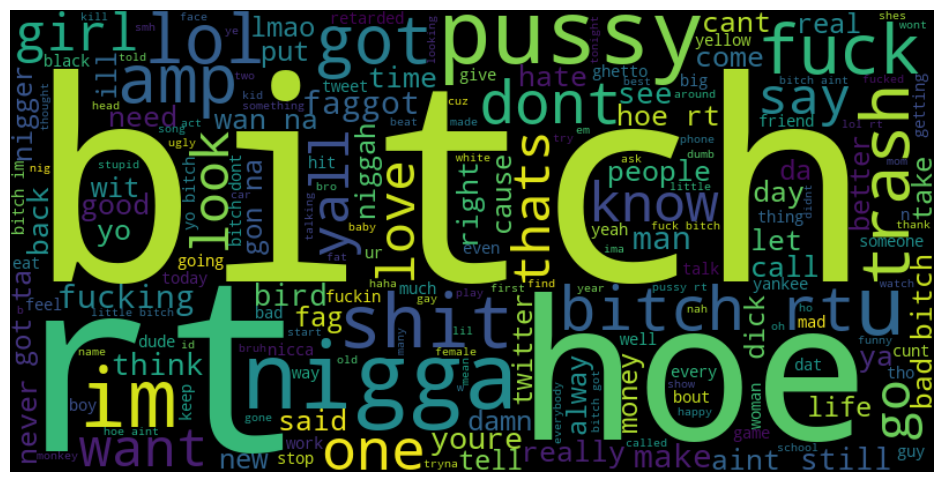

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud


# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(all_words)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()

In [15]:
#"rt" is 2 frequent word so let's filter it

stop_words = set(stopwords.words('english'))

# Add "rt" to the stopwords list since it's not useful
stop_words.add("rt")

# Remove stopwords from `clean_text`
filtered_words = [word for word in all_words.split() if word.lower() not in stop_words]

# Recalculate word frequency
filtered_word_counts = Counter(filtered_words)

# Convert to DataFrame
filtered_word_freq_df = pd.DataFrame(filtered_word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display top 10 most common words after cleaning
print(filtered_word_freq_df.head(10))


      Word  Frequency
26   bitch      11320
18     hoe       4283
34    like       2818
120  pussy       2216
59      im       2090
90   nigga       1990
109   dont       1781
54     got       1599
66     get       1536
63       u       1463


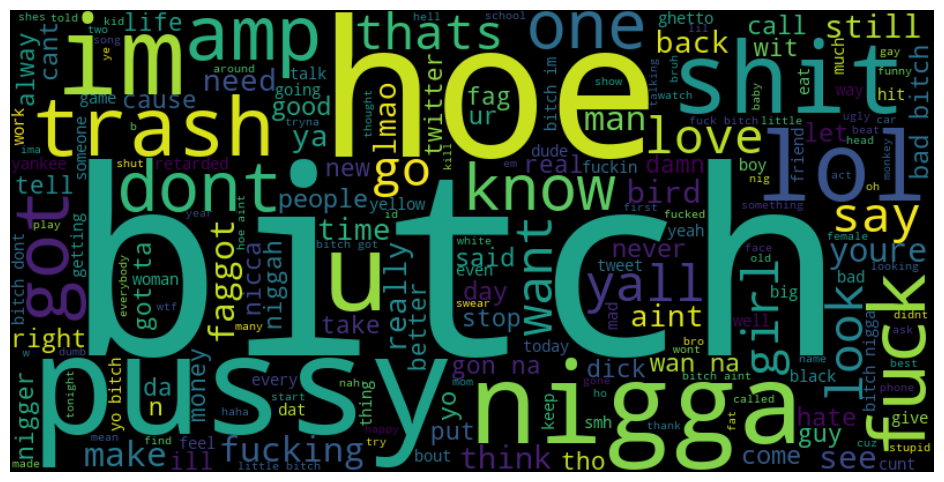

In [16]:
# Generate word cloud without stopwords
wordcloud_cleaned = WordCloud(width=800,
                              height=400, 
                        
                            background_color="black").generate(" ".join(filtered_words))

# Display the updated word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_cleaned, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_7108\265343640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=top_words, palette="viridis")


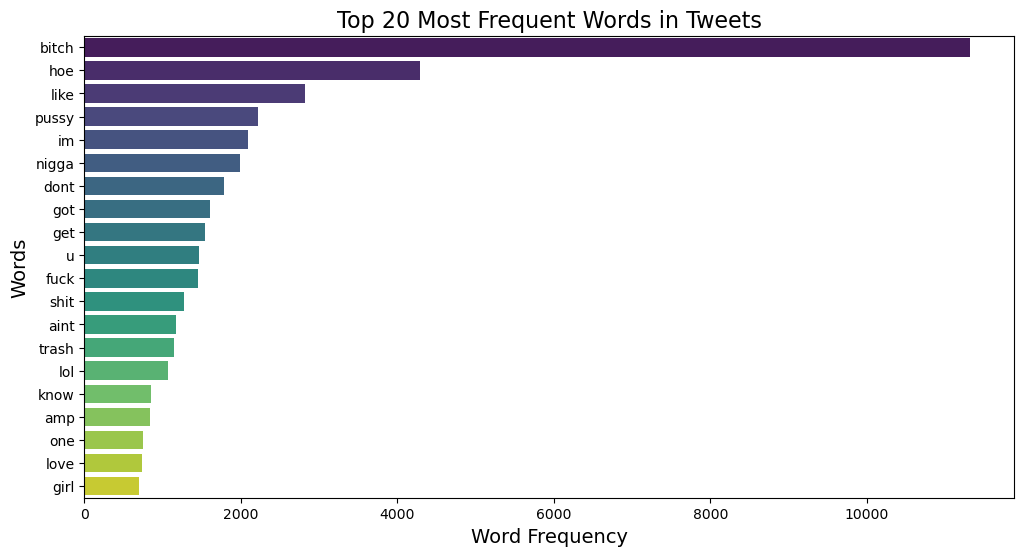

In [17]:
# Select the top 20 most common words
top_words = filtered_word_freq_df.head(20)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Word", data=top_words, palette="viridis")
plt.xlabel("Word Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.title("Top 20 Most Frequent Words in Tweets", fontsize=16)
plt.show()

In [18]:
from nltk.util import ngrams

# Function to get n-grams
def get_ngrams(text_series, n=2):
    all_ngrams = []
    for text in text_series:
        tokens = text.split()  # Split into words
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend(n_grams)
    return Counter(all_ngrams).most_common(20)  # Top 20

# Get bigrams & trigrams
bigrams = get_ngrams(df["clean_text"], 2)
trigrams = get_ngrams(df["clean_text"], 3)

# Convert to DataFrame for visualization
bigram_df = pd.DataFrame(bigrams, columns=["Bigram", "Frequency"])
trigram_df = pd.DataFrame(trigrams, columns=["Trigram", "Frequency"])

# Print the results
print("Top 10 Bigrams:\n", bigram_df.head(10))
print("\nTop 10 Trigrams:\n", trigram_df.head(10))

Top 10 Bigrams:
           Bigram  Frequency
0      (wan, na)        341
1   (bad, bitch)        321
2      (got, ta)        309
3      (gon, na)        293
4   (look, like)        269
5    (as, bitch)        254
6  (like, bitch)        252
7    (bitch, as)        240
8  (bitch, dont)        192
9    (yo, bitch)        190

Top 10 Trigrams:
                 Trigram  Frequency
0    (hoe, aint, loyal)         68
1    (bitch, as, nigga)         64
2         (im, gon, na)         49
3      (bitch, wan, na)         37
4   (bitch, look, like)         36
5     (dont, love, hoe)         33
6       (dont, wan, na)         33
7      (hoe, as, nigga)         30
8      (bitch, got, ta)         27
9  (bitch, thing, like)         24


C:\Users\PC\AppData\Local\Temp\ipykernel_7108\4290391481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_df["Frequency"], y=[" ".join(bigram) for bigram in bigram_df["Bigram"]], palette="viridis")


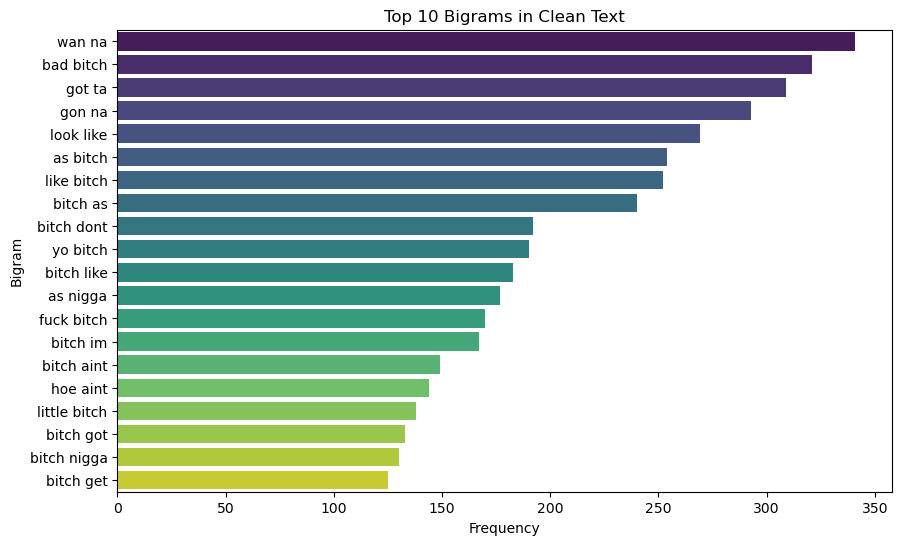

In [19]:
# Plotting top bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_df["Frequency"], y=[" ".join(bigram) for bigram in bigram_df["Bigram"]], palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.title("Top 10 Bigrams in Clean Text")
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_7108\839161907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trigram_df["Frequency"], y=[" ".join(trigram) for trigram in trigram_df["Trigram"]], palette="viridis")


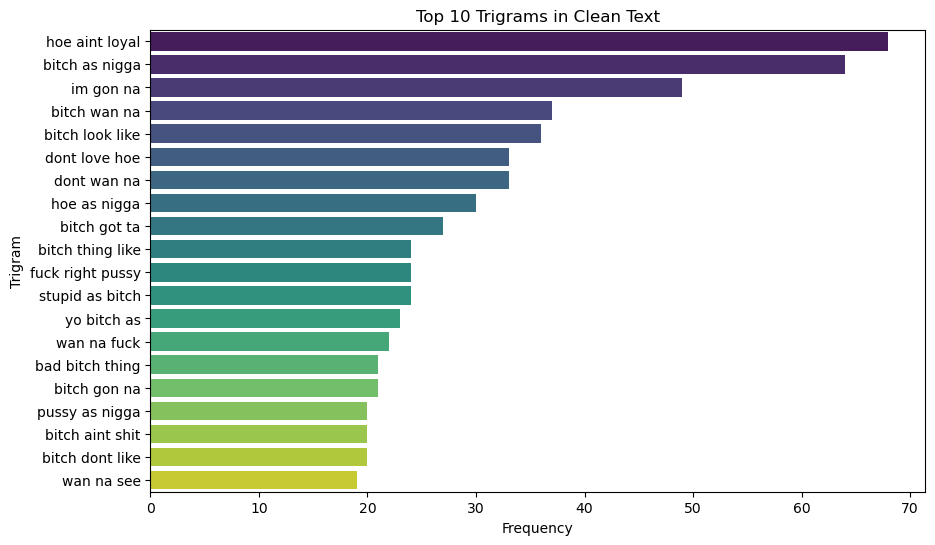

In [20]:
# Plotting top trigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=trigram_df["Frequency"], y=[" ".join(trigram) for trigram in trigram_df["Trigram"]], palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.title("Top 10 Trigrams in Clean Text")
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_7108\1997673297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["class"], palette="coolwarm")


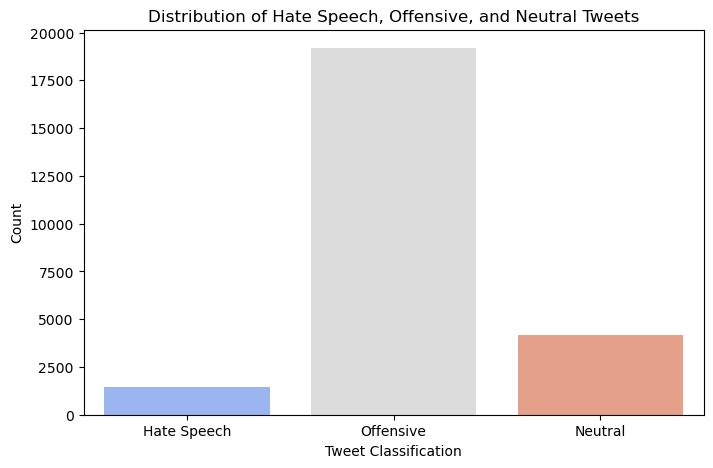

In [21]:
# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["class"], palette="coolwarm")
plt.xlabel("Tweet Classification")
plt.ylabel("Count")
plt.title("Distribution of Hate Speech, Offensive, and Neutral Tweets")
plt.xticks(ticks=[0, 1, 2], labels=["Hate Speech", "Offensive", "Neutral"])
plt.show()


In [22]:
#Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words="english", max_features=5000)

# Transform the clean_text column
X_bow = vectorizer.fit_transform(df_cleaned["clean_text"])

# Convert to DataFrame for inspection
X_bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())



In [23]:
X_bow_df.head()

,__________,_____al,__tharealist,__utcast___,_beautifulkeezy,_bucketsmcnasty,_cblaze,_d,_kaeejones,_kkz,...,zebra,zero,zimmerman,zip,zitlalyl,zmbiedance,zone,zoo,zooyorkinit,zzachbarness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Transform the clean_text column
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

# Convert to DataFrame for inspection
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [25]:
X_tfidf_df.head()

,__________,_____al,__tharealist,__utcast___,_beautifulkeezy,_bucketsmcnasty,_cblaze,_d,_kaeejones,_kkz,...,zebra,zero,zimmerman,zip,zitlalyl,zmbiedance,zone,zoo,zooyorkinit,zzachbarness
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split
X = X_bow  # or X_tfidf is possible 
y = df_cleaned["class"]  #  target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9554120851407243


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_train, y_pred, target_names=["Hate Speech", "Offensive Language", "Neither"])
print("Classification Report:")
print(report)


Confusion Matrix:
[[  604   484    52]
 [   64 15118   176]
 [    2   106  3220]]
Classification Report:
                    precision    recall  f1-score   support

       Hate Speech       0.90      0.53      0.67      1140
Offensive Language       0.96      0.98      0.97     15358
           Neither       0.93      0.97      0.95      3328

          accuracy                           0.96     19826
         macro avg       0.93      0.83      0.86     19826
      weighted avg       0.95      0.96      0.95     19826



In [28]:
import joblib

joblib.dump(model, "hate_speech_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [29]:
model=joblib.load("hate_speech_model.pkl")

In [30]:
y_test_pred=model.predict(X_test)


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix of testsets
y_pred = model.predict(X_train)
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Classification report testsets
report = classification_report(y_test, y_test_pred, target_names=["Hate Speech", "Offensive Language", "Neither"])
print("Classification Report:")
print(report)

Confusion Matrix:
[[  65  195   30]
 [  65 3640  127]
 [  10  102  723]]
Classification Report:
                    precision    recall  f1-score   support

       Hate Speech       0.46      0.22      0.30       290
Offensive Language       0.92      0.95      0.94      3832
           Neither       0.82      0.87      0.84       835

          accuracy                           0.89      4957
         macro avg       0.74      0.68      0.69      4957
      weighted avg       0.88      0.89      0.88      4957

